# Image process using openCV
by Jenny Zeng

It will extract hist bins of an image to be the features

In [4]:
import cv2
import numpy as np
import glob
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Biome

In [5]:
# parameters
NUM_BINS = 8 # number of bins for each channel
COLOR = ('b','g','r') # channel order in array
IMG_DIR_PATH = [
    ('/notebooks/Minecraft-AI/mc-data/biome_reg/mesa/**/*.jpg',0),
    ('/notebooks/Minecraft-AI/mc-data/biome_reg/forest/**/*.jpg',1),
    ('/notebooks/Minecraft-AI/mc-data/biome_reg/desert/**/*.jpg',2),
    ('/notebooks/Minecraft-AI/mc-data/biome_reg/jungle/**/*.jpg',3),
    ('/notebooks/Minecraft-AI/mc-data/biome_reg/eh/**/*.jpg',4)
]
FILE_SAVE_PATH = '/notebooks/Minecraft-AI/mc-data/biome_reg/loaded_data/mesa_forest_desert_jungle_eh_new.txt'
labels ={"mesa":0, "forest":1, "desert":2, 'jungle':3,"eh":4}

# Animal

In [6]:
# parameters
NUM_BINS = 8 # number of bins for each channel
COLOR = ('b','g','r') # channel order in array

In [7]:
IMG_DIR_PATH= [
    ('/notebooks/Minecraft-AI/mc-data/pig_reg/no_pig/**/*.jpg', "0"),
    ('/notebooks/Minecraft-AI/mc-data/pig_reg/pig/**/*.jpg', "1"),
    ('/notebooks/Minecraft-AI/mc-data/pig_reg/chicken_rgb/*.jpg', "2"),
     ('/notebooks/Minecraft-AI/mc-data/pig_reg/cow_rgb/*.jpg', "3")
]
FILE_SAVE_PATH= '/notebooks/Minecraft-AI/mc-data/animal.txt'

In [8]:
labels ={"no_pig":0, "pig":1, "chicken":2, 'cow':3}

# weather

In [9]:
# parameters
NUM_BINS = 8 # number of bins for each channel
COLOR = ('b','g','r') # channel order in array
IMG_DIR_PATH =[
    ('/notebooks/Minecraft-AI/mc-data/weather_reg/clear/**/*.jpg', "0"),
    ('/notebooks/Minecraft-AI/mc-data/weather_reg/normal/**/*.jpg', "0"),
    ('/notebooks/Minecraft-AI/mc-data/weather_reg/rain/**/*.jpg', "1"),
     ('/notebooks/Minecraft-AI/mc-data/weather_reg/thunder/**/*.jpg', "2")
]

FILE_SAVE_PATH= '/notebooks/Minecraft-AI/mc-data/clear_rain_thunder_train.txt'
labels3={"clear":0,"rain":1,"thunder":2}


## Analyze a sinlge image

In [10]:
plt.figure(figsize=(15,10))
plt.subplot(221)
IMG_PATH='/notebooks/Minecraft-AI/mc-data/pig_reg/no_pig/fence_rgb_2/fence_408.jpg'
img=cv2.imread(IMG_PATH)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.title("Figure 1: None class image")

In [11]:
plt.subplot(222)
hist = np.zeros((NUM_BINS,3))
bins = np.linspace(0, 256, NUM_BINS)
for i,col in enumerate(COLOR):
    histr = cv2.calcHist([img],[i],None,[NUM_BINS],[0,256])
    plt.plot(histr, color=col)
    hist[:,i] = histr[:,0]
plt.title("Figure 2: None class histogram")

In [12]:
plt.subplot(223)
IMG_PATH2='/notebooks/Minecraft-AI/mc-data/pig_reg/pig/pig_rgb_2/pig_43.jpg'
img2=cv2.imread(IMG_PATH2)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
plt.imshow(img2)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.title("Figure 1: Pig class image")

In [13]:
plt.subplot(224)
hist2 = np.zeros((NUM_BINS,3))
bins2= np.linspace(0, 256, NUM_BINS)
for i,col in enumerate(COLOR):
    histr2 = cv2.calcHist([img2],[i],None,[NUM_BINS],[0,256])
    plt.plot(histr2, color=col)
    hist2[:,i] = histr2[:,0]
plt.title("Figure 4: Pig class histogram")


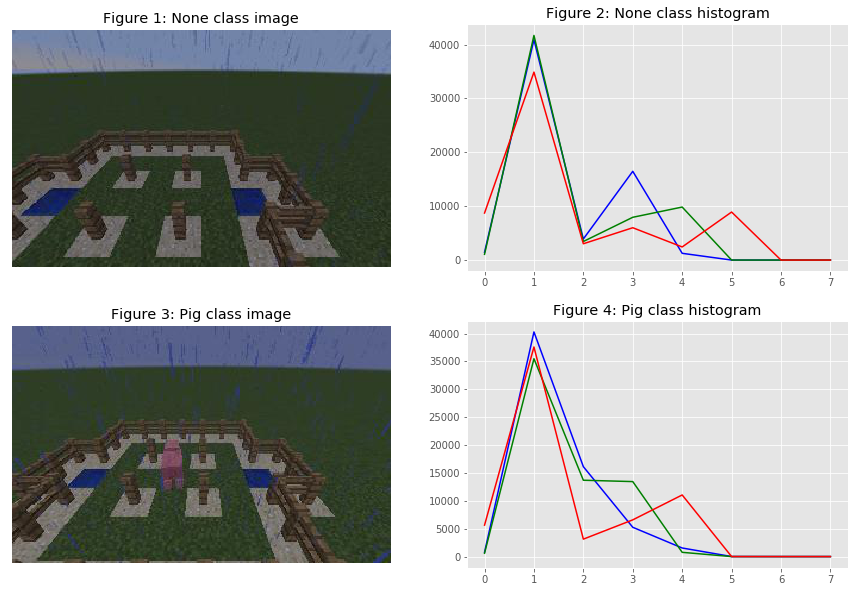

In [14]:
plt.show()

## historgram of the image



histr is an array with shape (NUM_BINS,1), that is 8 bins and 1 channel if NUM_BINS=8

In [ ]:
histr.shape

hist is an array with shape (NUM_BINS,3), hist is what we want to store as the features of an image

In [ ]:
hist.shape

reshape hist to be an 1-d array

In [ ]:
hist = hist.flatten()
hist

### helper function to convert a image to be data 
with 24 features and 1 label
(a 1-d array with length = 25)

In [ ]:
def convertImage(img_path, label):
    img=cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    hist = np.zeros((NUM_BINS,3))
    bins = np.linspace(0, 256, NUM_BINS)
    for i,col in enumerate(COLOR):
        histr = cv2.calcHist([img],[i],None,[NUM_BINS],[0,256])
        hist[:,i] = histr[:,0]
    hist = hist.flatten()
    hist = np.append(hist, label)
    return hist

In [ ]:
hist = convertImage(IMG_PATH, 0)
print hist


In [ ]:
hist.shape

In [ ]:
hist2 = convertImage(IMG_PATH2, 0)
print hist2

## save images to a txt file

### helper function on extracting images from a single dir with jpg images
each subdir has the images with the same class

In [ ]:
def extractFromSubdir(subdir, label):
    img_files = glob.glob(subdir)
    data = np.array([convertImage(img_dir,label) for img_dir in img_files])
    
    return data

# Test

In [ ]:
subdirn = "/notebooks/Minecraft-AI/mc-data/pig_reg/pig/pig_rgb_2/pig_43.jpg"
datan = extractFromSubdir(subdirn,1)

In [ ]:
datan

In [ ]:
np.random.shuffle(datan)

In [ ]:
FILE_SAVE_PATHn = '/notebooks/Minecraft-AI/mc-data/test1.txt'

In [ ]:
np.savetxt(FILE_SAVE_PATHn, datan, delimiter=';',fmt='%.4e')

from the example subdir, we get 209 imgs, and each image has 24 features, 1 label

### save all images in subdir of the IMG_DIR_PATH to a txt file

In [ ]:
subdir2, label2 = IMG_DIR_PATH2[0]
data2= extractFromSubdir(subdir2, label2) # assume has >=1 path

In [ ]:
data2

In [ ]:
def savetxt(IMG_DIR_PATH,FILE_SAVE_PATH):
    subdir, label = IMG_DIR_PATH[0]
    data= extractFromSubdir(subdir, label) # assume has >=1 path
    for subdir, label in (IMG_DIR_PATH[1:]):
        data = np.vstack((data, extractFromSubdir(subdir, label)))
    data=data.astype(np.float64)
    np.random.shuffle(data)
    np.savetxt(FILE_SAVE_PATH, data, delimiter=';',fmt='%.4e')
    return data
    

# Weather

In [ ]:
dataw=savetxt(IMG_DIR_PATH3,FILE_SAVE_PATH3)

In [ ]:
dataw[:,-1]

# Biomes

In [ ]:
datab=savetxt(IMG_DIR_PATH,FILE_SAVE_PATH)

# Animal

In [ ]:
dataa=savetxt(IMG_DIR_PATH2,FILE_SAVE_PATH2)

## example for loading data from txt

In [ ]:
data = np.loadtxt(FILE_SAVE_PATH, delimiter=';')

In [ ]:
print data.shape

In [ ]:
np.random.shuffle(data)

In [ ]:
X = data[:,:-1]
Y = data[:,-1].astype(np.int64)

In [ ]:
print X.shape
print Y.shape

In [ ]:
Xtr, Xte, Ytr, Yte = ml.splitData(X,Y,train_fraction=0.8)

In [ ]:
print Xtr.shape
print Xte.shape
print Ytr.shape
print Yte.shape